In [1]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

<h1 style="color: #FF8C00;">01 | Data Extraction </h1>

In [2]:
data = pd.read_csv("king_country_houses.csv")

<h2 style="color: #FF6347;">Exploring the Data (First impression)</h2>

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Overview
### Price: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.
## Target Variable
- **`Price`**:The sale price of the house (prediction target).
 
## Features
The following features are included in the dataset and are used to predict the target variable:

- **`id`**: A unique identifier for a house.
  
- **`date`**: The date on which the house was sold

- **`bedrooms:`**: Number of bedrooms in the house. 
 

- **`bathrooms:`**:Number of bathrooms in the house, per bedroom.

- **`sqft_living:`**:Square footage of the interior living space
  
- **`sqft_lot`**: Square footage of the land space
  
- **`floors:`**:Number of floors (levels) in the house.

- **`waterfront:`**: Whether the house has a waterfront view

- **`view: `**: : Number of times the house has been viewed.

- **`condition`**: he overall condition of the house
- **`grade`**: The overall grade given to the house, based on the King County grading system.
- **`sqft_above`**: Square footage of the house apart from the basement. 
- **`sqft_basement`**:Square footage of the basement.
- **`yr_built`**:  The year the house was built   
- **`yr_renovated`**: The year the house was renovated
- **`zipcode`**:ZIP code area. lat: Latitude coordinate.
- **`lat`**:Latitude coordinate.
- **`long`**: Longitude coordinate.
- **`sqft_living15`**:The interior living space for the nearest 15 neighbors in 2015.
- **`sqft_lot15`**:The land spaces for the nearest 15 neighbors in 2015.


In [4]:
data.shape

(21613, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<h2 style="color: #FF6347;">Columns standardization</h2>

In [6]:
data.columns = data.columns.str.lower().str.replace(" ", "_")

<h2 style="color: #FF6347;">Copy as best practices</h2>

In [7]:
df = data.copy()

<h1 style="color: #FF8C00;">02 | Data Cleaning </h1>

<h2 style="color: #FF6347;">Dealing with Data types</h2>

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df.set_index('id')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
#df['date'] = pd.to_datetime(df['date'])
#df['date'] = df['date'].str.split("T").str[0].astype(int)

<h2 style="color: #FF6347;">Dealing with NaN values</h2>

In [12]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h2 style="color: #FF6347;">Dealing with Duplicates</h2>

In [13]:
df.duplicated().sum()

0

<h2 style="color: #FF6347;">Dealing with Empty Spaces</h2>

In [14]:
df.eq(" ").sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h1 style="color: #FF8C00;">03 | EDA </h1>

<h2 style="color: #FF6347;">Checking unique values</h2>

In [15]:
df.nunique()

id               21436
date               372
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [16]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [17]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

<h2 style="color: #FF6347;">Descriptve Statistics</h2>

In [18]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


## Summary
price: The mean price is approximately $540,182, with a wide range from $75,000 to $7,700,000.
bedrooms: The average number of bedrooms is around 3.37, with a maximum of 33 (which seems unusual). You might want to investigate further.
bathrooms: The average number of bathrooms is approximately 2.11, with a maximum of 8.
sqft_living: The average living area size is about 2,080 square feet, with a maximum of 13,540 square feet.
sqft_lot: The average lot size is around 15,107 square feet, with a maximum of 1,651,359 square feet.
floors: The average number of floors is approximately 1.49.
waterfront: This column seems to be binary (0 or 1), indicating whether a property is waterfront.
view: The average view score is around 0.23, with a maximum of 4.
condition: The average condition score is approximately 3.41.
grade: The average grade is 7.66, with a maximum of 13.
sqft_above: The average above-ground living area size is about 1,788 square feet.
sqft_basement: The average basement area size is approximately 291 square feet.
yr_built: The average year of construction is around 1971.
yr_renovated: The average year of renovation is approximately 84, with a maximum of 2015.
zipcode: The average zip code is 98077.94.
lat and long: These columns represent latitude and longitude coordinates.
sqft_living15: The average living area size of neighboring properties (based on the 15 nearest neighbors) is about 1,987 square feet.

In [19]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,21613.0,4580301520.864988,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0,2876565571.312049
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21613.0,540182.158793,75000.0,321950.0,450000.0,645000.0,7700000.0,367362.231718
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318


### Sort Data by Price

In [20]:
df.sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,2015-02-17,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,2014-05-06,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,2015-03-24,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,2014-11-05,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [21]:
df.sort_values('price',ascending=False).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [22]:
df.sort_values('price',ascending=False).tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8274,3883800011,2014-11-05,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,2015-03-24,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,2014-05-06,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
1149,3421079032,2015-02-17,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882


<h2 style="color: #FF6347;">Moving our target to the right</h2>

In [23]:
target = df.pop('price')

In [24]:
type(target)

pandas.core.series.Series

In [25]:
df['price'] = target

In [26]:
df.head(3)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0


### Inspect each Column

In [27]:
for val in df:
    print(df[val].value_counts())
    print()

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64

date
2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: count, Length: 372, dtype: int64

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25     

<h3 style="color: #FF6347;">Checking our target distribution</h3>

C:\Users\PC\AppData\Local\Temp\ipykernel_106804\1933923878.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

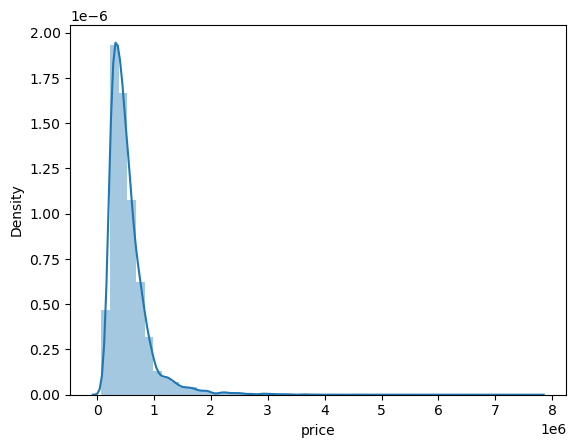

In [28]:
plt.figure(figure=(12,8))
#sns.distplot(df["price"], color=color, kde=True);
sns.distplot(df['price'])

C:\Users\PC\AppData\Local\Temp\ipykernel_106804\2997073087.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_living'])
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sqft_living', ylabel='Density'>

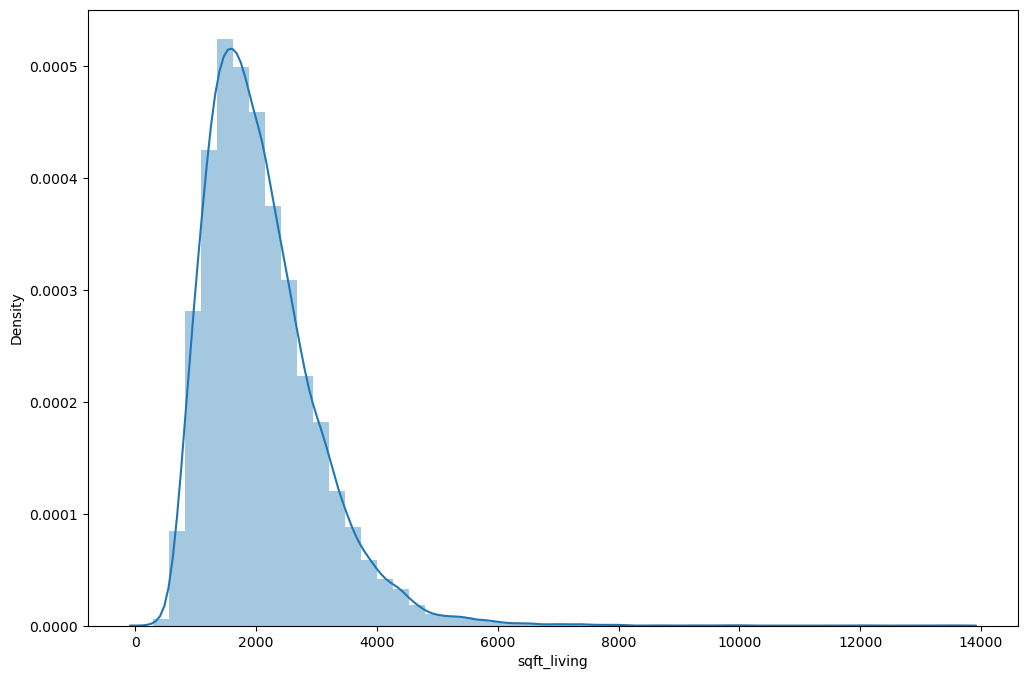

In [29]:
plt.figure(figsize =(12,8))
sns.distplot(df['sqft_living'])

<Axes: xlabel='bathrooms', ylabel='price'>

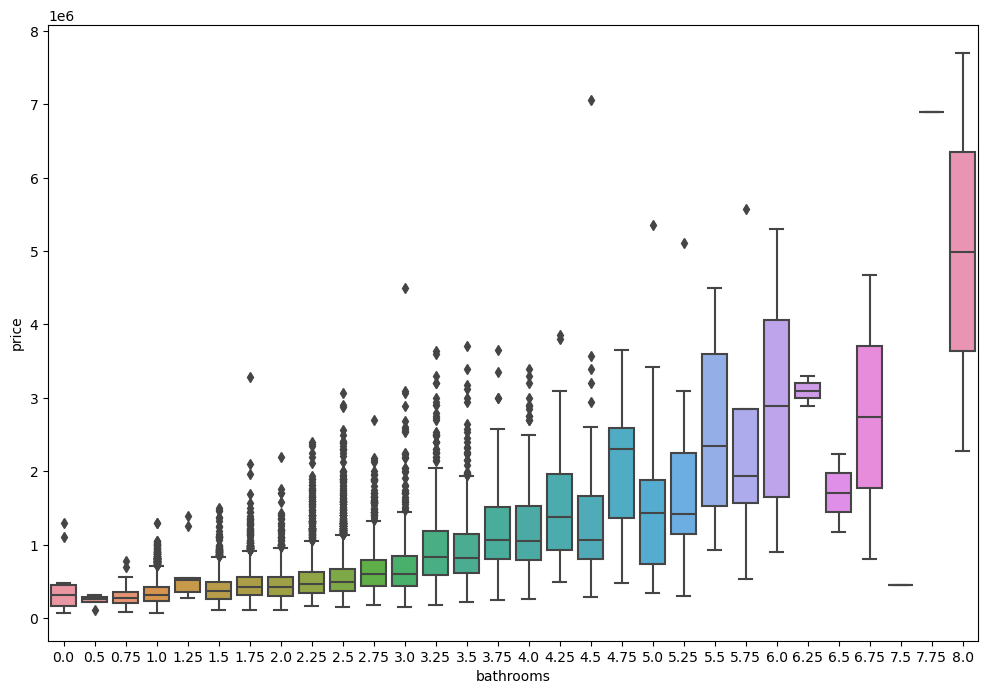

In [30]:
plt.figure(figsize = (12,8))
sns.boxplot(x='bathrooms',y='price',data=df)

In [31]:
#plt.figure(figsize = (10,6))
#sns.countplot(df['bedrooms'])
df.bedrooms.value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

<Axes: xlabel='bedrooms', ylabel='price'>

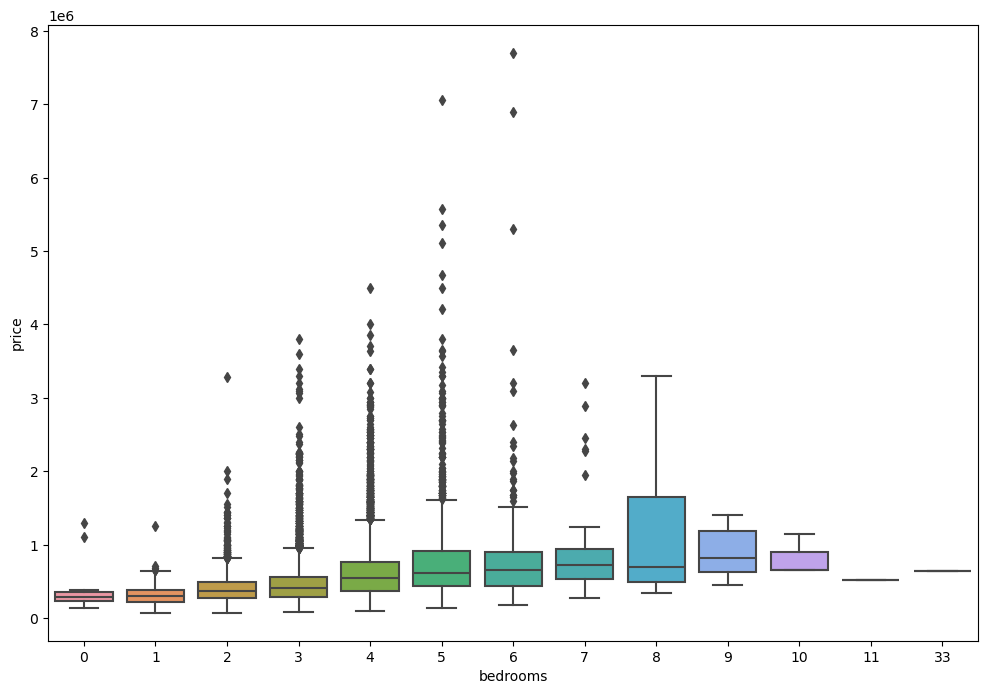

In [32]:
plt.figure(figsize = (12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

<Axes: xlabel='bathrooms', ylabel='price'>

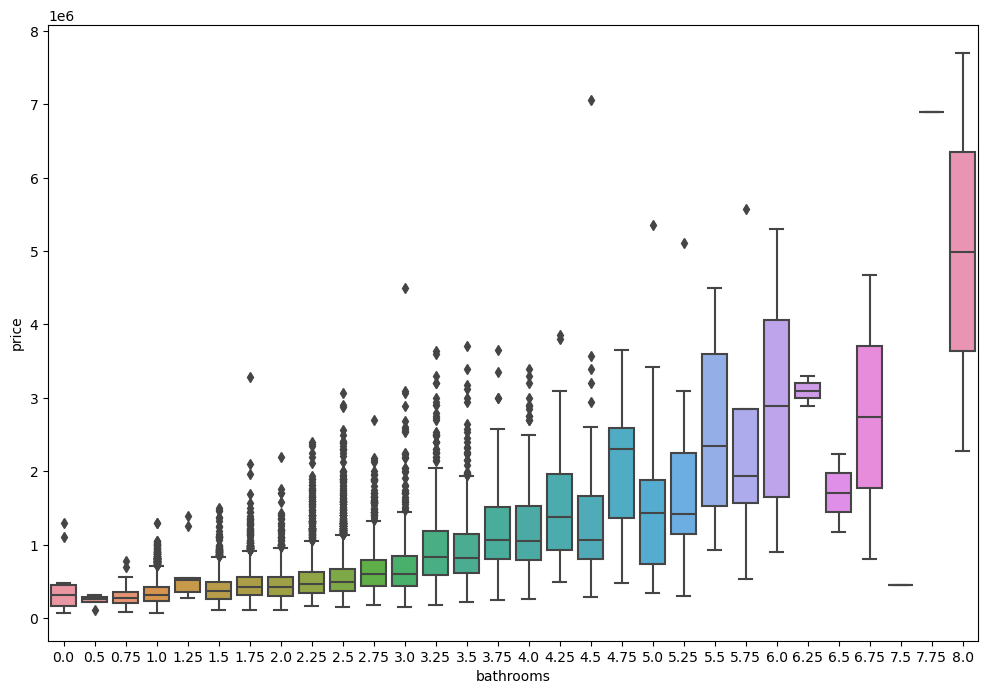

In [33]:
plt.figure(figsize = (12,8))
sns.boxplot(x='bathrooms',y='price',data=df)

<h3 style="color: #FF6347;">FE</h3>

In [34]:
# Define function has_basement
def has_basement(df):
    '''creates bool feature has_basement and drops original basement feature'''
    df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('sqft_basement', axis = 1)
    return df

In [35]:
# Apply function to df
df = has_basement(df)

In [36]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,has_basement
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,1955,0,98178,47.5112,-122.257,1340,5650,221900.0,0
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0,1
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,1933,0,98028,47.7379,-122.233,2720,8062,180000.0,0
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,1965,0,98136,47.5208,-122.393,1360,5000,604000.0,1
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,1987,0,98074,47.6168,-122.045,1800,7503,510000.0,0


In [37]:
# Define function viewed
def viewed(df):
    '''creates bool feature viewed and drops original view feature'''
    df['viewed'] = df['view'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('view', axis = 1)
    return df

In [38]:
# Apply function to df
df = viewed(df)

In [39]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,has_basement,viewed
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,221900.0,0,0
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0,1,0
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,180000.0,0,0
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,604000.0,1,0
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,510000.0,0,0


In [40]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [41]:
def round_bathrooms(df):
    '''Round bathroom feature and convert to int'''
    df['bathrooms'] = df['bathrooms'].map(lambda x: int(round(x,0)))
    return df

In [42]:
# Apply function to df
df = round_bathrooms(df)

In [43]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,has_basement,viewed
0,7129300520,2014-10-13,3,1,1180,5650,1.0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,221900.0,0,0
1,6414100192,2014-12-09,3,2,2570,7242,2.0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0,1,0
2,5631500400,2015-02-25,2,1,770,10000,1.0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,180000.0,0,0
3,2487200875,2014-12-09,4,3,1960,5000,1.0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,604000.0,1,0
4,1954400510,2015-02-18,3,2,1680,8080,1.0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,510000.0,0,0


In [44]:
#df.hist(figsize = (15,12))
#plt.show()

In [45]:
df['house_age'] = 2015 - df['yr_built']

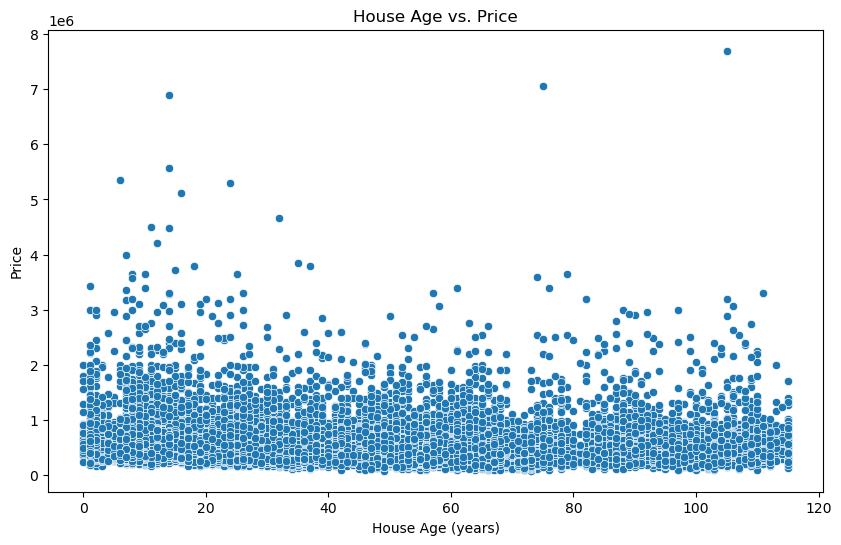

In [46]:
# Plot the relationship between house age and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_age', y='price', data=df)
plt.title('House Age vs. Price')
plt.xlabel('House Age (years)')
plt.ylabel('Price')
plt.show()

In [47]:
# Calculate the correlation between house age and price
correlation = df['house_age'].corr(df['price'])
print(f'Correlation between house age and price: {correlation:.2f}')

Correlation between house age and price: -0.05


In [48]:
## The correlation coefficient of -0.05 suggests that there is a very slight tendency for house prices to decrease as the age of the house increases.
## The age of a house might be less relevant in high-demand locations where prices are driven more by location than by the age of the property.

In [49]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,has_basement,viewed,house_age
0,7129300520,2014-10-13,3,1,1180,5650,1.0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,221900.0,0,0,60
1,6414100192,2014-12-09,3,2,2570,7242,2.0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,538000.0,1,0,64
2,5631500400,2015-02-25,2,1,770,10000,1.0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,180000.0,0,0,82
3,2487200875,2014-12-09,4,3,1960,5000,1.0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,604000.0,1,0,50
4,1954400510,2015-02-18,3,2,1680,8080,1.0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,510000.0,0,0,28


#### With 1.75 bathrooms, a sale price of $640,000 it is likely that this house has 3 bedrooms and the 33 was a data entry error.

In [50]:
df[df['bedrooms'] == 33]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,has_basement,viewed,house_age
15870,2402100895,2014-06-25,33,2,1620,6000,1.0,0,5,7,...,0,98103,47.6878,-122.331,1330,4700,640000.0,1,0,68


In [51]:
# Fix typo for bedrooms
df.loc[15870, 'bedrooms'] = 3

In [52]:
df.loc[15870]

id                        2402100895
date             2014-06-25 00:00:00
bedrooms                           3
bathrooms                          2
sqft_living                     1620
sqft_lot                        6000
floors                           1.0
waterfront                         0
condition                          5
grade                              7
sqft_above                      1040
yr_built                        1947
yr_renovated                       0
zipcode                        98103
lat                          47.6878
long                        -122.331
sqft_living15                   1330
sqft_lot15                      4700
price                       640000.0
has_basement                       1
viewed                             0
house_age                         68
Name: 15870, dtype: object

In [53]:
originalsize = len(df)
originalsize

21613

### Grade

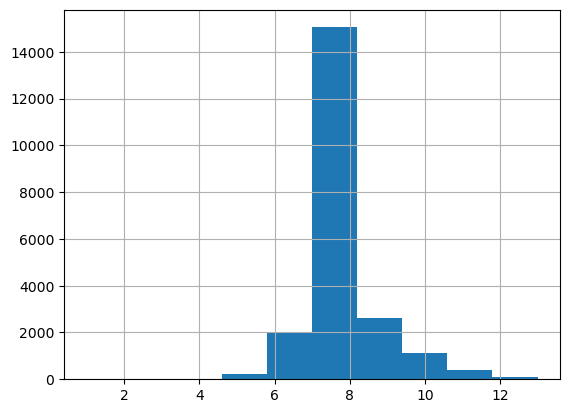

In [54]:
import pylab as p
df['grade'].hist()
p.show()

(-0.5, 11.5, 0.0, 8000000.0)

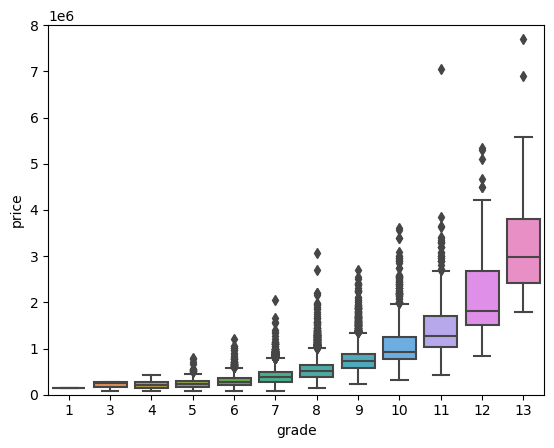

In [55]:
fig=sns.boxplot(x='grade',y='price',data=df)
fig.axis(ymin=0, ymax=8000000)

### Year Built

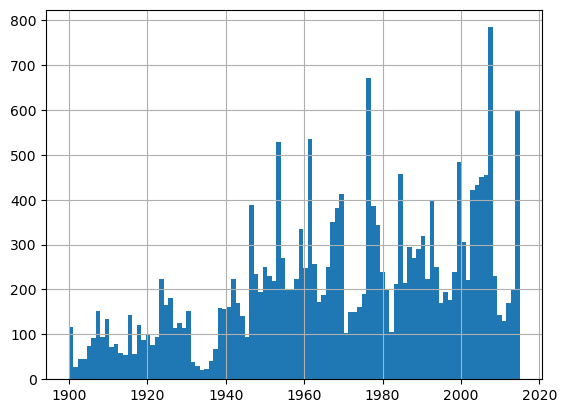

In [56]:
df['yr_built'].hist(bins=100)
p.show()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


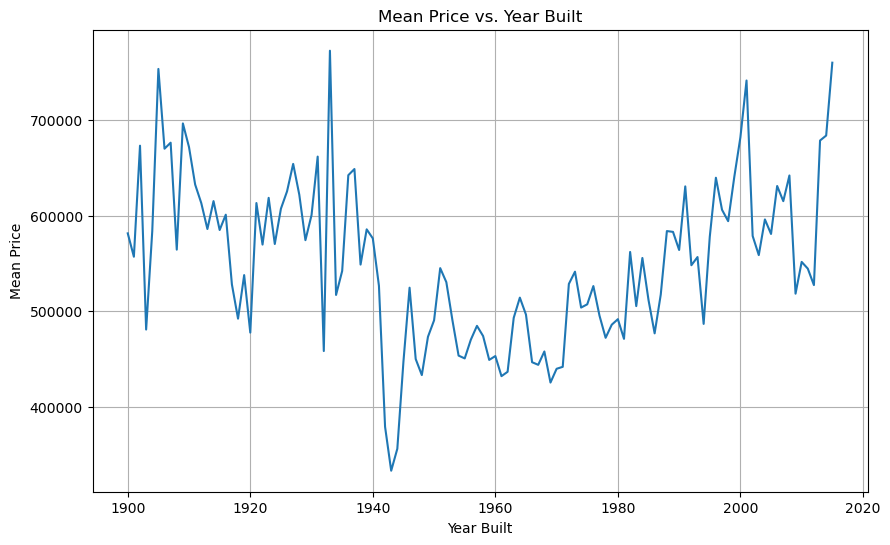

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by year built and calculate mean price
yearly_mean_price = df.groupby('yr_built')['price'].mean().reset_index()

# Plot the mean price vs. year built
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr_built', y='price', data=yearly_mean_price)
plt.title('Mean Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()


You can see that generally there has been an increase in the number of houses built over time,followed by around 3~5 years of decrease
but there are notable declines in the 1930s and 1970s. The decrease in the number of houses constructed during the 1930s
is probably connected to the Great Depression that commenced with the 1929 Wall Street Crash.
In the 1970s, the presence of the Cold War and Vietnam War, as well as an oil crisis in 1973, could have all played a part in 
the decline of house construction during that era.
As for the mean house price for houses built in a particular year, houses built pre-1940 and post-1980 are generally worth more than average now whereas houses built from 1940-1980 are worth less on average.

### Scatter plot for price vs. sqft_living

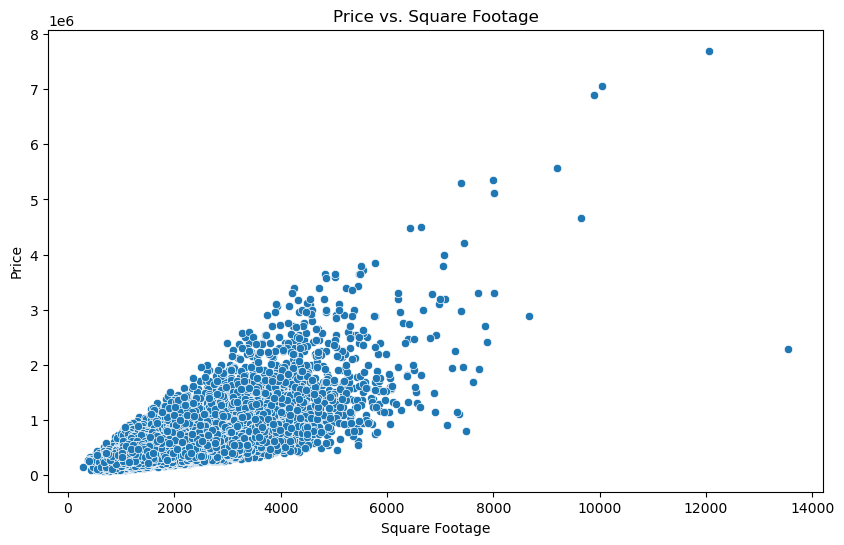

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'House Price')

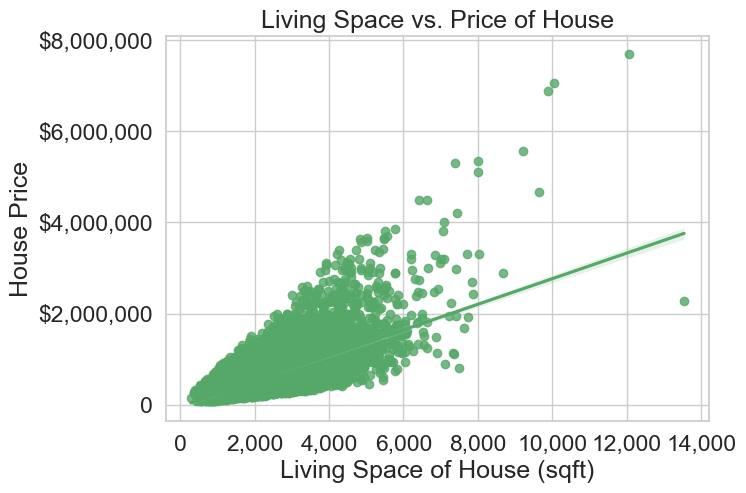

In [59]:
#create a regression plot for sqft living vs price
sqft_living = df['sqft_living']
price = df['price']/1000000
sqftliving = pd.DataFrame(df, columns = ['sqft_living', 'price'])
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [7, 5]})
sns.regplot(x=sqft_living, y=price, data=df, color="g").set_title('Living Space vs. Price of House')
plt.yticks([0, 2, 4, 6, 8], ['0', '$2,000,000', '$4,000,000', '$6,000,000', '$8,000,000'])
plt.xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000], ['0', '2,000', '4,000', '6,000', '8,000', '10,000', '12,000', '14,000'])
plt.xlabel('Living Space of House (sqft)')
plt.ylabel('House Price')
# plt.savefig("Fig2: sqft_price.png")

### Waterfront properties come at a premium

<Axes: xlabel='waterfront', ylabel='price'>

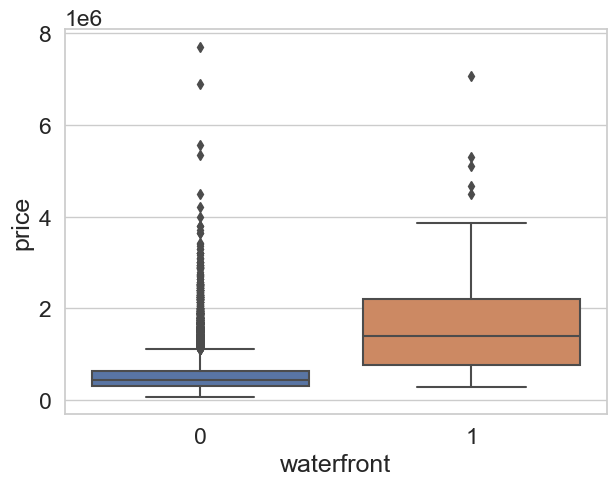

In [60]:
sns.boxplot(x='waterfront',y='price',data=df)

### Latitude and Longitude

<Axes: xlabel='long', ylabel='lat'>

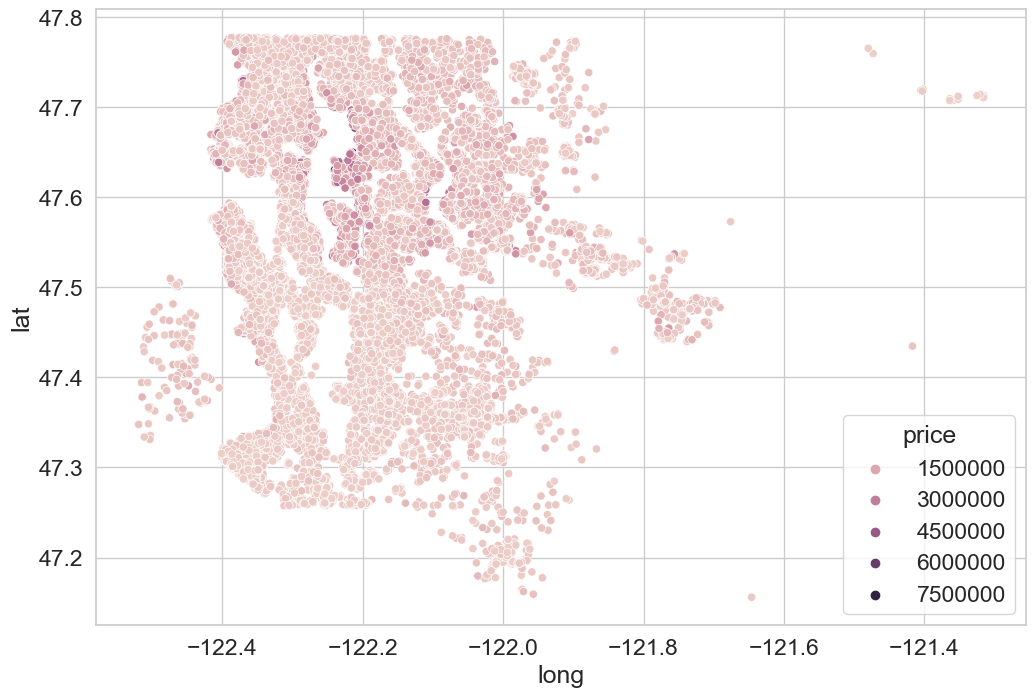

In [61]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

### Drop Some Strings

In [62]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price', 'has_basement', 'viewed', 'house_age'],
      dtype='object')

In [63]:
dcol=['id','date']
df.drop(dcol,axis=1,inplace=True)

In [64]:
df.head().transpose

<bound method DataFrame.transpose of    bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  condition  \
0         3          1         1180      5650     1.0           0          3   
1         3          2         2570      7242     2.0           0          3   
2         2          1          770     10000     1.0           0          3   
3         4          3         1960      5000     1.0           0          5   
4         3          2         1680      8080     1.0           0          3   

   grade  sqft_above  yr_built  yr_renovated  zipcode      lat     long  \
0      7        1180      1955             0    98178  47.5112 -122.257   
1      7        2170      1951          1991    98125  47.7210 -122.319   
2      6         770      1933             0    98028  47.7379 -122.233   
3      7        1050      1965             0    98136  47.5208 -122.393   
4      8        1680      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15   

<h2 style="color: #FF6347;">Looking for Correlations</h2>

In [65]:
num_corr = round(df.corr(), 2)

In [66]:
num_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,has_basement,viewed,house_age
bedrooms,1.00,0.50,0.59,0.03,0.18,-0.01,0.03,0.37,0.49,0.16,0.02,-0.16,-0.01,0.13,0.40,0.03,0.32,0.17,0.08,-0.16
bathrooms,0.50,1.00,0.70,0.09,0.37,0.07,-0.07,0.59,0.60,0.38,0.07,-0.14,0.05,0.15,0.50,0.09,0.52,0.23,0.20,-0.38
sqft_living,0.59,0.70,1.00,0.17,0.35,0.10,-0.06,0.76,0.88,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,0.70,0.20,0.27,-0.32
sqft_lot,0.03,0.09,0.17,1.00,-0.01,0.02,-0.01,0.11,0.18,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,0.09,-0.04,0.07,-0.05
floors,0.18,0.37,0.35,-0.01,1.00,0.02,-0.26,0.46,0.52,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,0.26,-0.26,0.02,-0.49
waterfront,-0.01,0.07,0.10,0.02,0.02,1.00,0.02,0.08,0.07,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.27,0.04,0.26,0.03
condition,0.03,-0.07,-0.06,-0.01,-0.26,0.02,1.00,-0.14,-0.16,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00,0.04,0.14,0.05,0.36
grade,0.37,0.59,0.76,0.11,0.46,0.08,-0.14,1.00,0.76,0.45,0.01,-0.18,0.11,0.20,0.71,0.12,0.67,0.05,0.24,-0.45
sqft_above,0.49,0.60,0.88,0.18,0.52,0.07,-0.16,0.76,1.00,0.42,0.02,-0.26,-0.00,0.34,0.73,0.19,0.61,-0.21,0.15,-0.42
yr_built,0.16,0.38,0.32,0.05,0.49,-0.03,-0.36,0.45,0.42,1.00,-0.22,-0.35,-0.15,0.41,0.33,0.07,0.05,-0.17,-0.06,-1.00


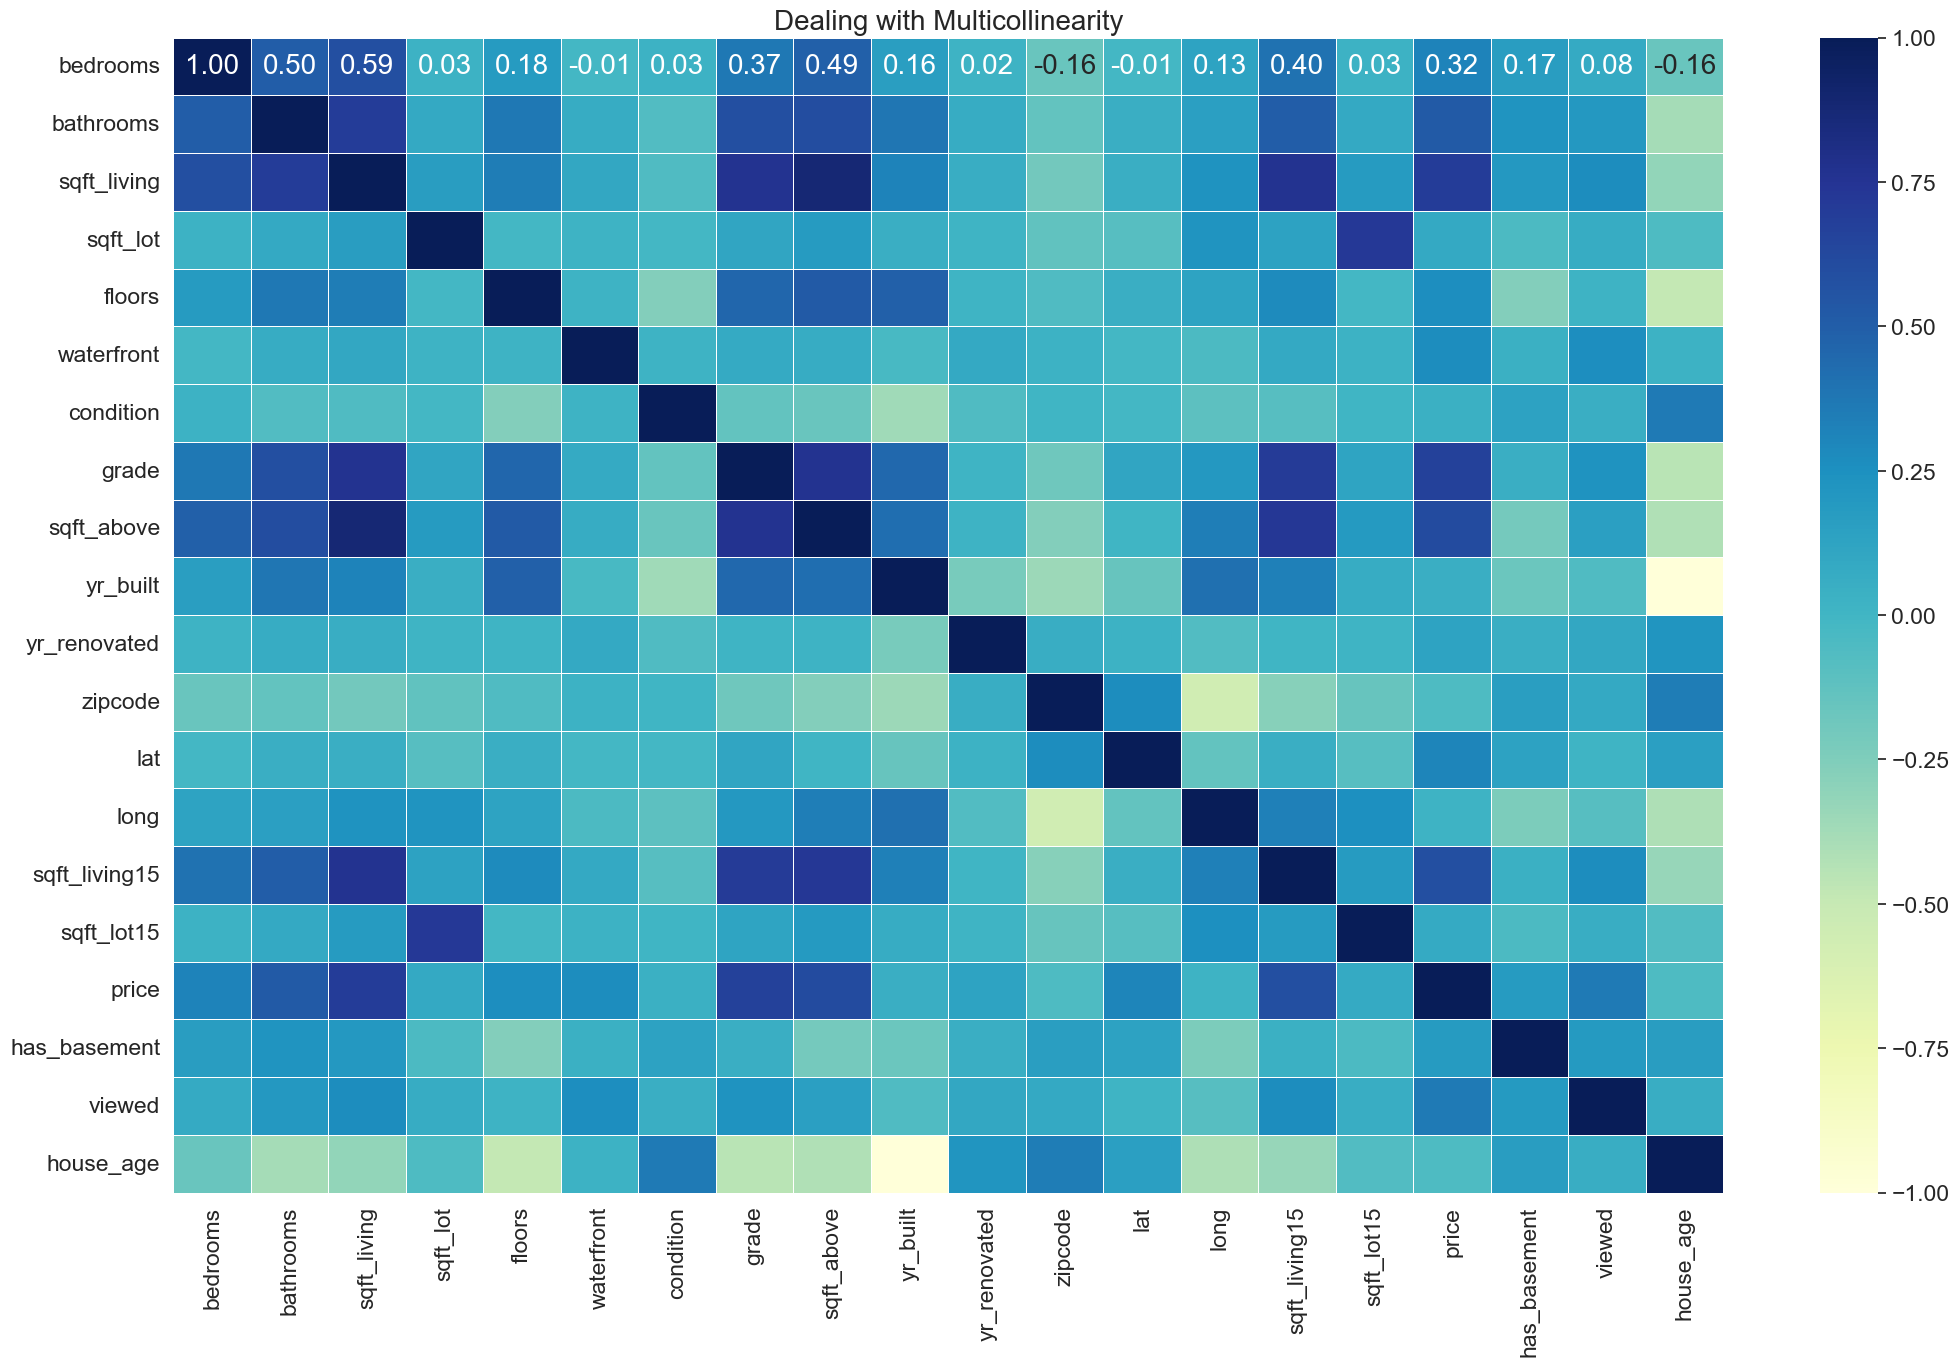

In [67]:
# Correlation Matrix-Heatmap Plot
#mask = np.zeros_like(num_corr)
#mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, annot=True, annot_kws={"size": 20}, linewidths=.5, cmap="YlGnBu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

## Check for Outliers:

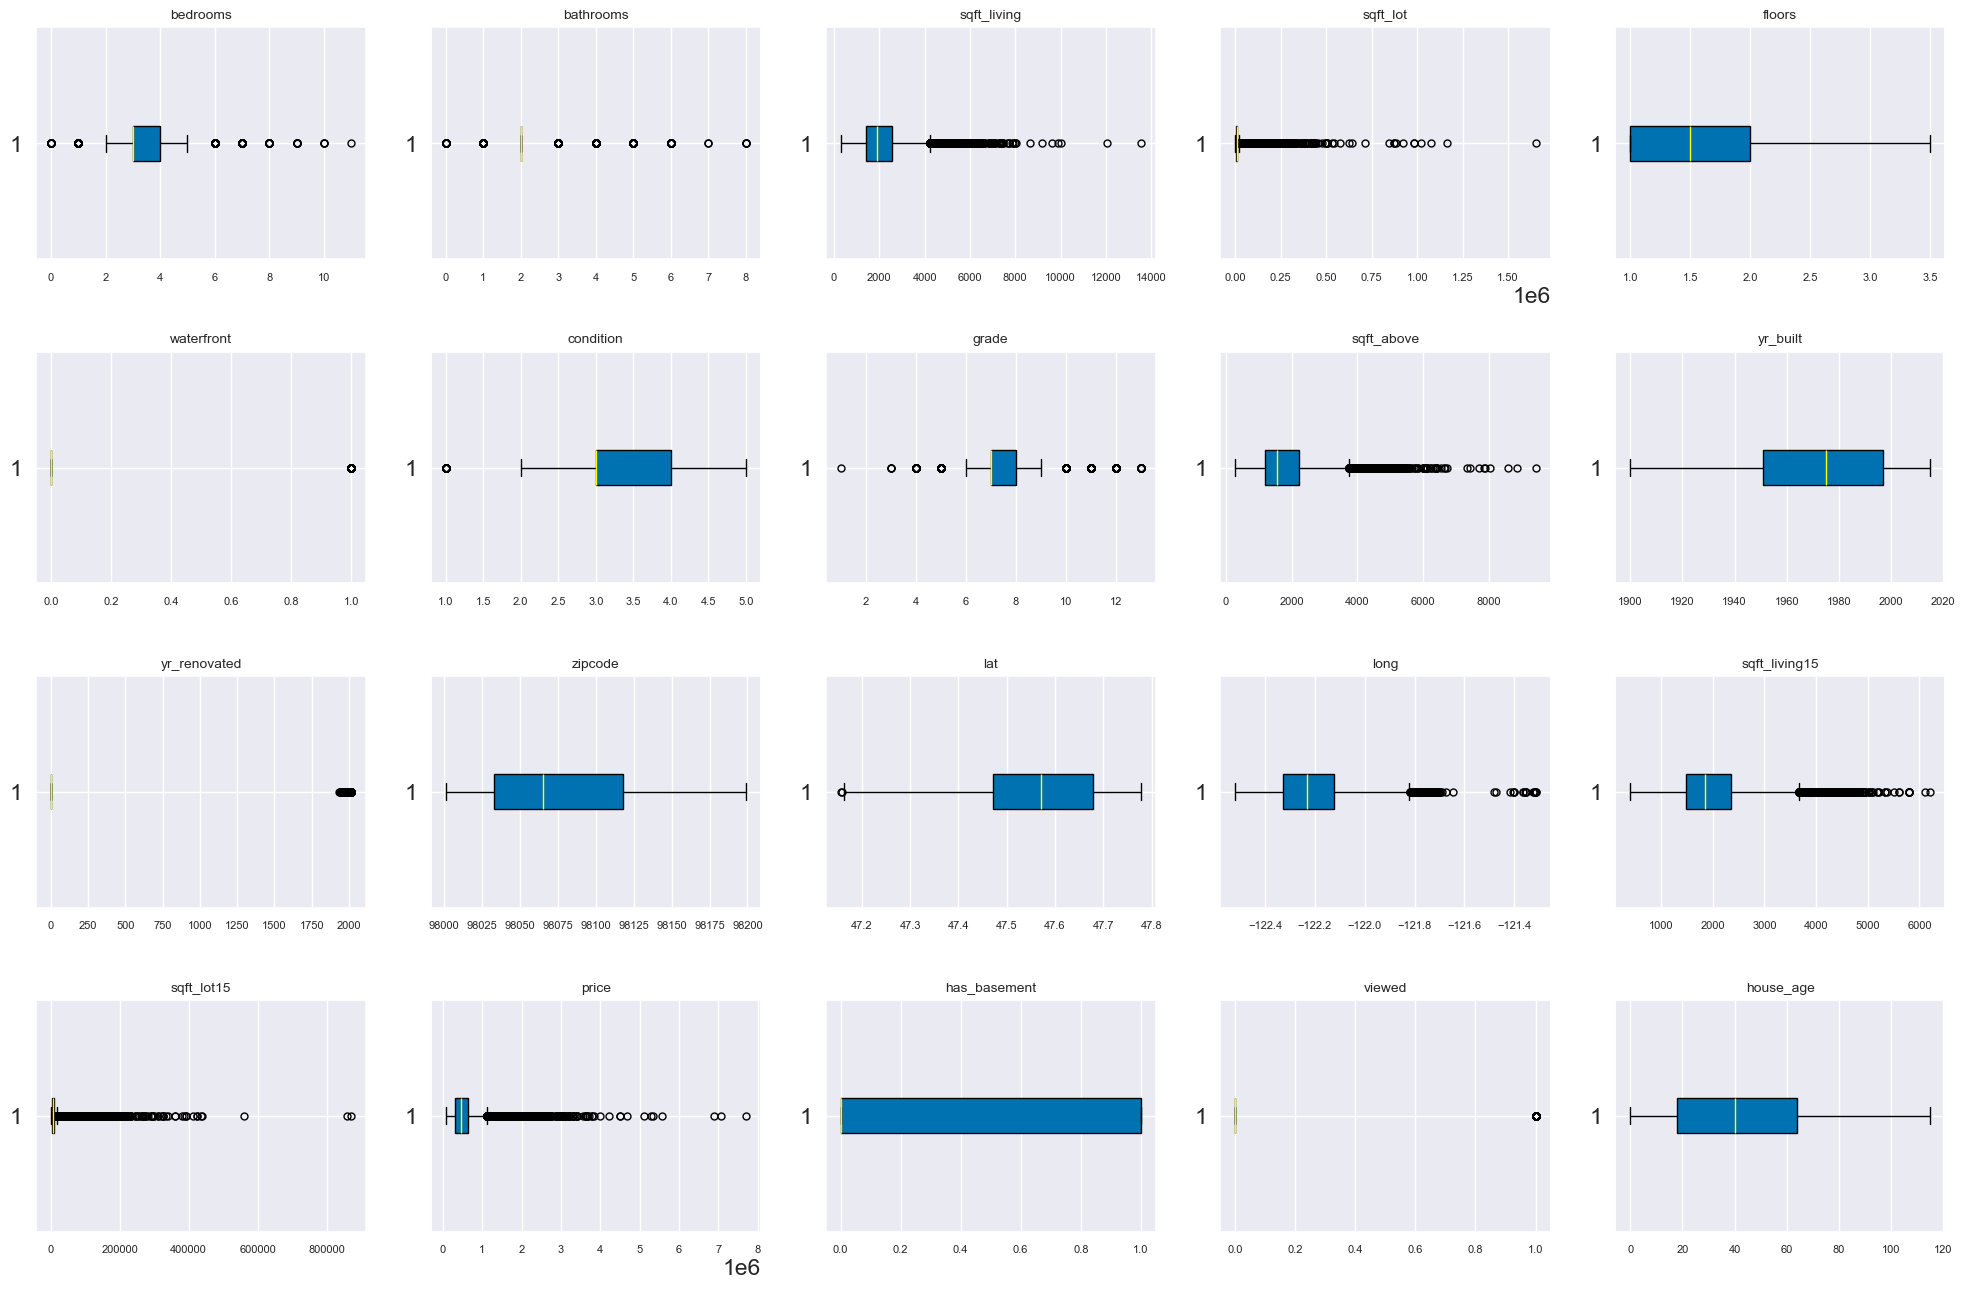

In [68]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [69]:
# Handle outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))] 

In [70]:
print(df['price'].describe())  # after removeing outliers

count    2.045400e+04
mean     4.765912e+05
std      2.078479e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.372000e+05
75%      6.000000e+05
max      1.120000e+06
Name: price, dtype: float64


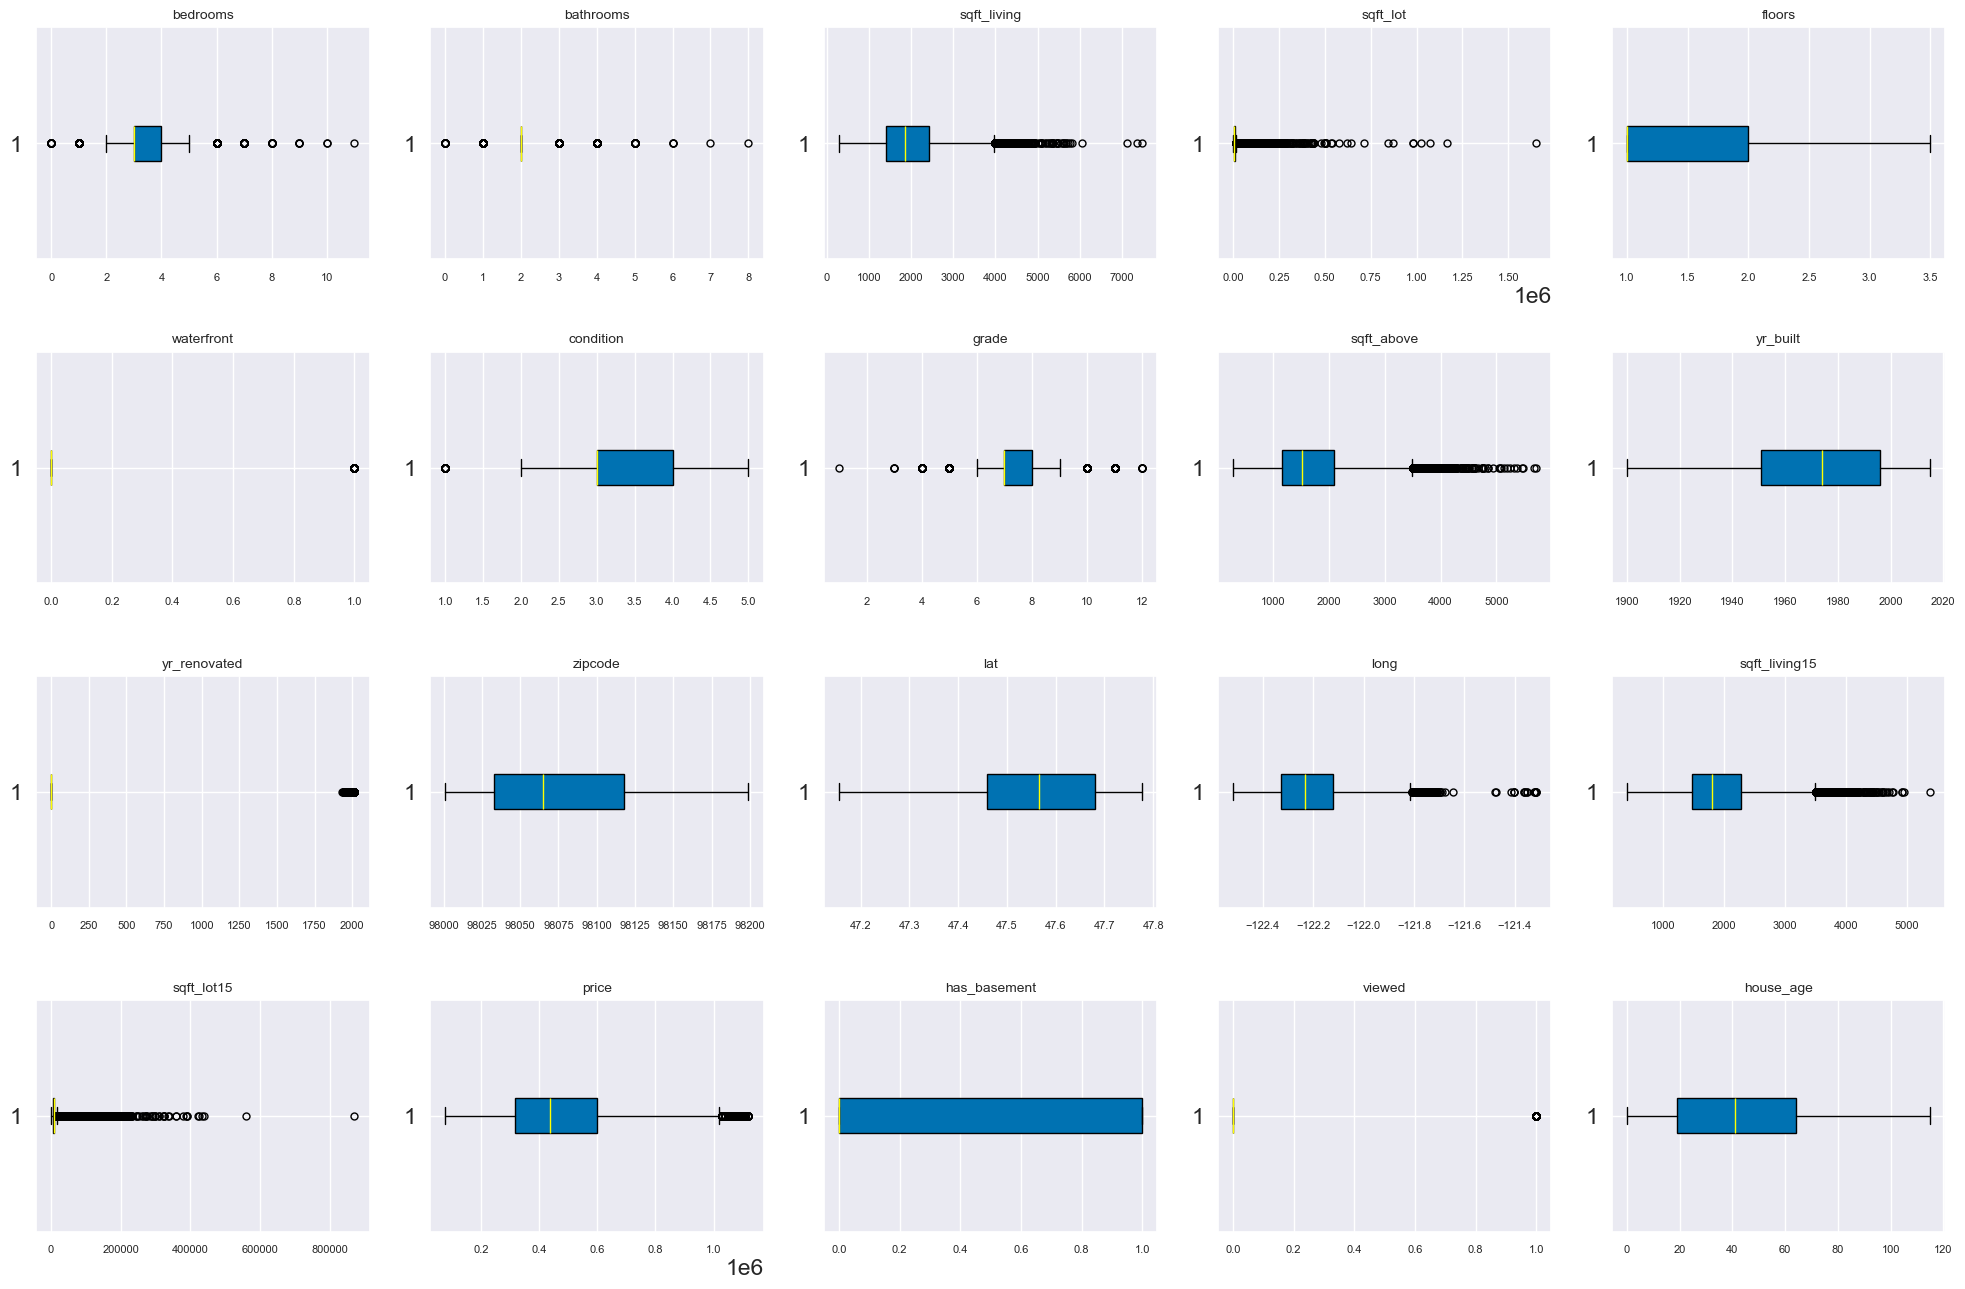

In [71]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

### Full Sample target variable and independent variable

In [72]:
X=df.drop('price',axis=1)
y=df['price']

### Splitting to training and testing data

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 20454.
70% for training data: 14317.
30% for test data: 6137.


<h2 style="color: #FF6347;">Linear Regression </h2>

In [75]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### model prediction

In [76]:
y_pred=lm.predict(X_test)
y_pred

array([185189.27318963, 458835.7346887 , 388518.49917045, ...,
       189470.60209513, 362331.89697869, 724761.49224751])

In [77]:
print(f'30% for test prediction data is {len(y_pred)}.')

30% for test prediction data is 6137.


In [78]:
# Make a dataframe to compare
eval_df = pd.DataFrame({"actual":y_test,"pred":y_pred})
eval_df

,actual,pred
13301,241000.0,185189.273190
19096,375000.0,458835.734689
9231,230000.0,388518.499170
21119,769995.0,679547.280482
18498,206000.0,198936.026318
...,...,...
19059,218000.0,267483.065855
8867,310000.0,236087.197996
6719,244500.0,189470.602095
2758,400000.0,362331.896979


In [79]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
13301,241000.0,185189.273190,55810.726810
19096,375000.0,458835.734689,83835.734689
9231,230000.0,388518.499170,158518.499170
21119,769995.0,679547.280482,90447.719518
18498,206000.0,198936.026318,7063.973682


In [80]:
mae = np.mean(eval_df["dif"])
mae

86995.43959321958

<h3 style="color: #FF6347;">Metrics</h3>

In [81]:
r2_3 = r2_score(y_test, y_pred)
RMSE_3 = mean_squared_error(y_test, y_pred, squared=False)
MSE_3 = mean_squared_error(y_test, y_pred)
MAE_3 = mean_absolute_error(y_test, y_pred)

In [82]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.6925
RMSE =  115418.7984
MSE =   13321499034.6781
MAE =  86995.4396


Text(0.5, 1.0, 'prices vs predicated prices')

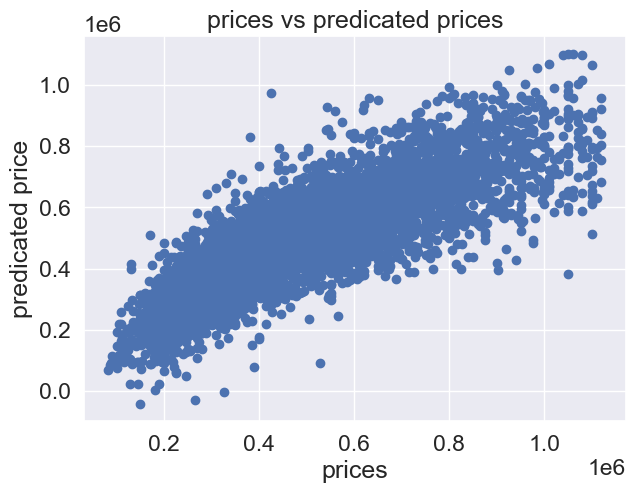

In [83]:
# visualizing the differences between actual prices and predicated values
plt.scatter(y_test,y_pred)
plt.xlabel('prices')
plt.ylabel('predicated price')
plt.title('prices vs predicated prices')

<h2 style="color: #FF6347;">Selecting the Model: Ridge Regression</h2>

In [84]:
from sklearn.linear_model import Ridge

In [85]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

<h2 style="color: #FF6347;">Model Validation</h2>

In [86]:
# Make predictions on the test dataset
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([185462.39038977, 459004.86048304, 387908.40696617, ...,
       189656.24341885, 361893.11888763, 724634.39278516])

<h3 style="color: #FF6347;">Metrics</h3>

In [87]:
r2_3_2 = r2_score(y_test, y_pred_ridge)
RMSE_3_2 = mean_squared_error(y_test, y_pred_ridge ,squared=False)
MSE_3_2 = mean_squared_error(y_test, y_pred_ridge)
MAE_3_2 = mean_absolute_error(y_test, y_pred_ridge)

In [88]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6925
RMSE =  115420.2514
The value of the metric MSE is  13321834429.4338
MAE =  87001.4813


<h2 style="color: #FF6347;">Selecting the Model: Lasso Regression</h2>

In [89]:
from sklearn.linear_model import Lasso

In [90]:
lasso = Lasso()
lasso.fit(X_train, y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.083e+13, tolerance: 6.177e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

<h2 style="color: #FF6347;">Model Validation</h2>

In [91]:
predictions_lasso = lasso.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [92]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [93]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.6925
RMSE =  115418.6296
The value of the metric MSE is  13321460064.7749
MAE =  86995.3244


<h2 style="color: #FF6347;">Selecting the Model: Random Forest</h2>

In [94]:
# Import 
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

<h2 style="color: #FF6347;">Model Evaluation</h2>

In [95]:
y_pred_randomF=reg.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [96]:
r2_3_4 = r2_score(y_test, y_pred_randomF)
RMSE_3_4 = mean_squared_error(y_test, y_pred_randomF, squared=False)
MSE_3_4 = mean_squared_error(y_test, y_pred_randomF)
MAE_3_4 = mean_absolute_error(y_test, y_pred_randomF)

In [97]:
#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.8673
RMSE =  75813.804
The value of the metric MSE is  5747732876.4451
MAE =  52552.6225


Text(0.5, 1.0, 'prices vs predicated prices')

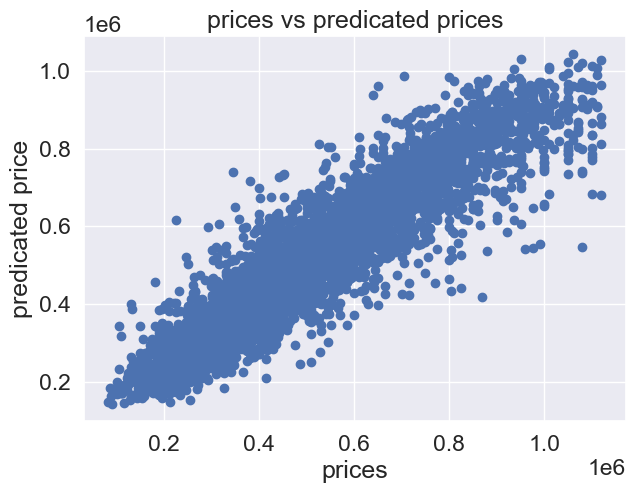

In [98]:
# visualizing the differences between actual prices and predicated values
plt.scatter(y_test,y_pred_randomF)
plt.xlabel('prices')
plt.ylabel('predicated price')
plt.title('prices vs predicated prices')

<h2 style="color: #FF6347;">Normalization with Log Transform</h2>

<h2 style="color: #FF6347;">XGBoost Regressor</h2>

In [99]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
y_pred_XGB=xgb.predict(X_test)

<h3 style="color: #FF6347;">Metrics</h3>

In [101]:
r2_3_5 = r2_score(y_test, y_pred_XGB)
RMSE_3_5 = mean_squared_error(y_test, y_pred_XGB, squared=False)
MSE_3_5 = mean_squared_error(y_test, y_pred_XGB)
MAE_3_5 = mean_absolute_error(y_test,y_pred_XGB)

In [102]:
#Printing the results
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("The value of the metric MSE is ", round(MSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.8761
RMSE =  73268.1127
The value of the metric MSE is  5368216339.2372
MAE =  51700.923


<h2 style="color: #FF6347;">Feature Importance</h2>

In [103]:
feature_names = list(X_train.columns)
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order

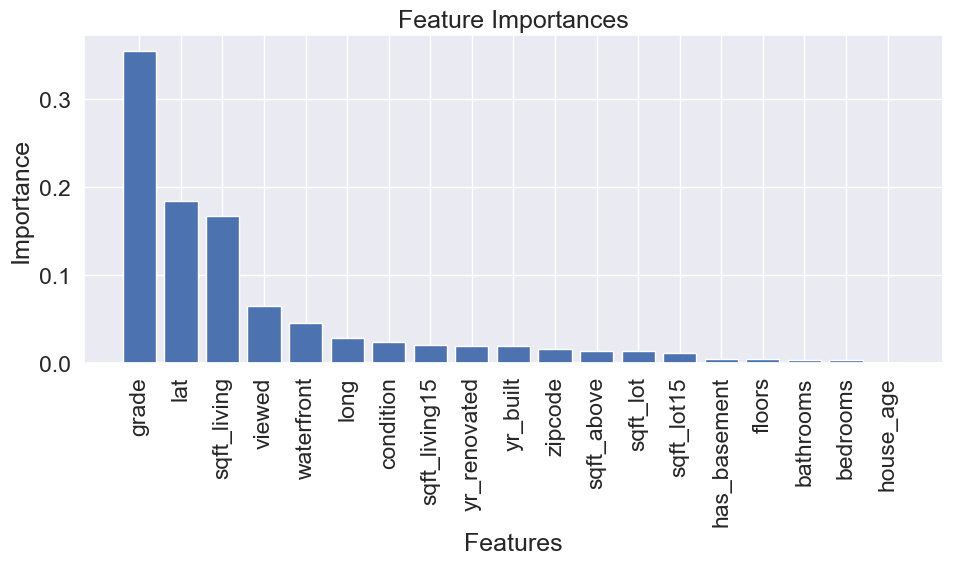

In [104]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Comparision</h2>

In [105]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest', 'XGBoost'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5], 
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5],
    'MSE': [MSE_3, MSE_3_2, MSE_3_3, MSE_3_4, MSE_3_5],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5]
}

In [106]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model")

,R²,RMSE,MSE,MAE
Model,,,,
Linear Regression,0.692479,115418.798446,1.332150e+10,86995.439593
Ridge,0.692472,115420.251384,1.332183e+10,87001.481306
Lasso,0.692480,115418.629626,1.332146e+10,86995.324367
Random Forest,0.867316,75813.803997,5.747733e+09,52552.622510
XGBoost,0.876077,73268.112704,5.368216e+09,51700.923013


Interpretation
R-squared (R²):

Linear Models: All three linear models (Linear Regression, Ridge, and Lasso) have similar R² values (0.688), indicating that they explain around 68.8% of the variance in the house prices.
Random Forest: This model has a much higher R² of 0.864, explaining 86.4% of the variance.
XGBoost: This model has the highest R² of 0.872, explaining 87.2% of the variance.

Root Mean Squared Error (RMSE):

Linear Models: The RMSE values for the linear models are similar (116,266), indicating the average prediction error in terms of house prices is around $116,266.
Random Forest: The RMSE is significantly lower at 76,760, indicating better predictive performance.
XGBoost: The RMSE is the lowest at 74,408, suggesting the best performance among the models.

Mean Squared Error (MSE):

Linear Models: The MSE values are around 13.5 billion, which is quite high.
Random Forest: The MSE is much lower at approximately 5.89 billion.
XGBoost: The MSE is the lowest at approximately 5.54 billion.

Mean Absolute Error (MAE):

Linear Models: The MAE values are around $87,645, reflecting the average absolute error.
Random Forest: The MAE is significantly lower at approximately $53,174.
XGBoost: The MAE is the lowest at approximately $52,185, indicating the smallest average prediction error.

In [107]:
 #Our primary focus is to understand which features most significantly impact the house price.

<h2 style="color: #FF6347;"> Hyperparameter Tuning for XGBoost</h2>

In [108]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the XGBoost regressor
xgb = XGBRegressor()

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best score found: ", best_score)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Best score found:  -5278383960.118978


In [109]:
# Assume you have split the data into training and test sets
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost regressor with the best parameters
best_xgb = XGBRegressor(**best_params)

# Fit the model on the training data
best_xgb.fit(X_train, y_train)

# Predicting on the test data
y_pred = best_xgb.predict(X_test)

# Evaluating the model on the test data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


R²: 0.8845
RMSE: 70748.14
MSE: 5005299502.00
MAE: 49444.87


### Additionally, we aim to explore properties valued at $650K and above for more detailed insights

In [110]:
# Filter for high-value properties
high_value_properties = df[df['price'] >= 650000]

# Summary statistics for high-value properties
#print(high_value_properties.describe())
high_value_properties.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,has_basement,viewed,house_age
10,3,2,3560,9796,1.0,0,3,8,1860,1965,0,98007,47.6007,-122.145,2210,8925,662500.0,1,0,50
15,4,3,2950,5000,2.0,0,3,9,1980,1979,0,98126,47.5714,-122.375,2140,4000,650000.0,1,1,36
26,3,2,2450,2691,2.0,0,3,8,1750,1915,0,98119,47.6386,-122.360,1760,3573,937000.0,1,0,100
27,3,1,1400,1581,1.5,0,5,8,1400,1909,0,98112,47.6221,-122.314,1860,3861,667000.0,0,0,106
29,4,2,2570,7173,2.0,0,3,8,2570,2005,0,98052,47.7073,-122.110,2630,6026,719000.0,0,0,10


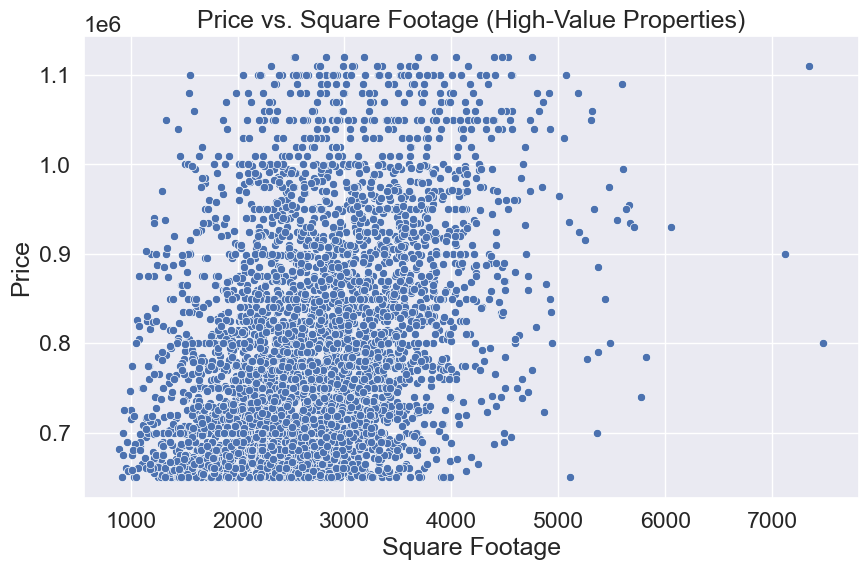

In [111]:
# Scatter plot for high-value properties
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=high_value_properties)
plt.title('Price vs. Square Footage (High-Value Properties)')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

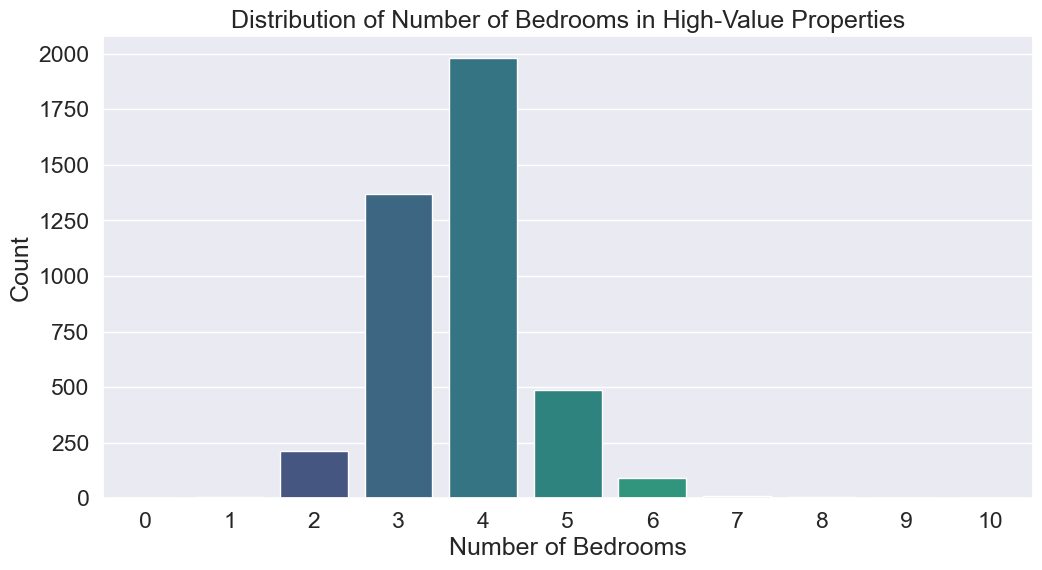

In [112]:
# Count the number of properties for each number of bedrooms
bedroom_counts = high_value_properties['bedrooms'].value_counts().sort_index()

# Plot the distribution of bedrooms
plt.figure(figsize=(12, 6))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, palette='viridis')
plt.title('Distribution of Number of Bedrooms in High-Value Properties')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

In [113]:
portfolio = df.sample(10, random_state=1)

# Portfolio statistics
portfolio_return = portfolio['price'].mean()
portfolio_risk = portfolio['price'].std()

print(f'Portfolio Return (Average Price): ${portfolio_return:.2f}')
print(f'Portfolio Risk (Standard Deviation of Prices): ${portfolio_risk:.2f}')

Portfolio Return (Average Price): $574900.00
Portfolio Risk (Standard Deviation of Prices): $223829.03


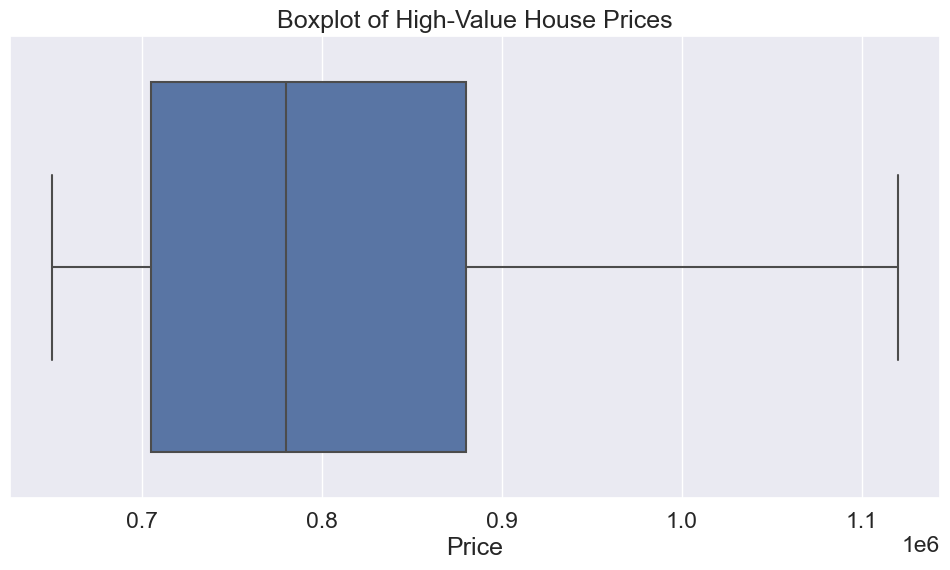

In [114]:
# Boxplot to see the distribution of high-value properties
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', data=high_value_properties)
plt.title('Boxplot of High-Value House Prices')
plt.xlabel('Price')
plt.show()

The median price is around $750K.
The IQR ranges from $700K to $850K, indicating that the middle 50% of high-value properties are within this range.
There are several outliers extending beyond $1 million, suggesting the presence of very high-end properties.
The distribution appears right-skewed, with a longer whisker on the higher end, indicating that while most high-value properties are clustered around the median, there are some that are much more expensive.

In [115]:
feature_names = list(X_train.columns)
importances =best_xgb.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order

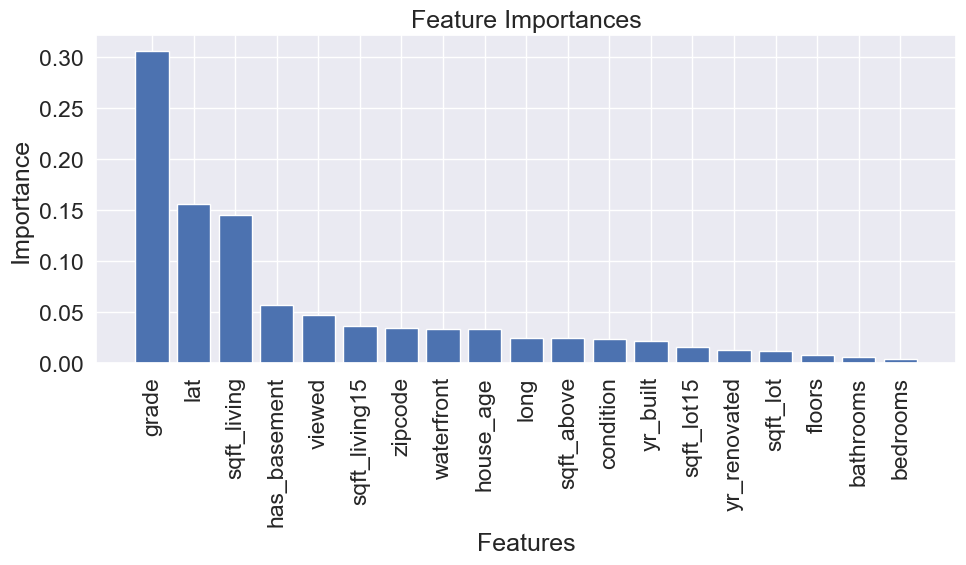

In [116]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
gameWinners([150, 'yes'],[200, 'no']) //'Gryffindor wins!'
gameWinners([400, 'no'],[350, 'yes']) //'Slytherin wins!'


In [ ]:
def gameWinners(Gryffindor,Slytherin):
    if(Gryffindor==1)